In [1]:
# importing required librabries


In [2]:

import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt



In [3]:
#scraping data from yahoo

In [4]:
start = '2010-01-01'
end = '2019-12-31'
df = pdr.DataReader('AAPL','yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553026
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564355
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459941
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998


In [5]:
df.tail()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.027298
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.416672
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.389565
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.813286
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.337990


In [6]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553026
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564355
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459941
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998


In [7]:
#ploting graph for closing value

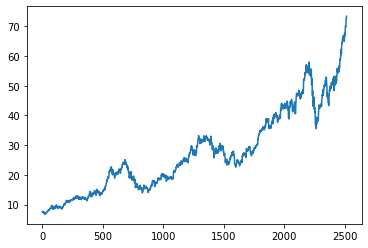

In [8]:
plt.plot(df.Close)

In [9]:
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.452591
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553026
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564355
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459941
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998
...,...,...,...,...,...,...,...
2512,2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,70.027298
2513,2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.416672
2514,2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.389565
2515,2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.813286


In [10]:
# 100 days moving average for predicting 101th day and so on
# rolling() takes first 100 values from close column 

In [11]:
ma100 = df.Close.rolling(100).mean()
ma100


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

In [12]:
# 100 days moving average graph

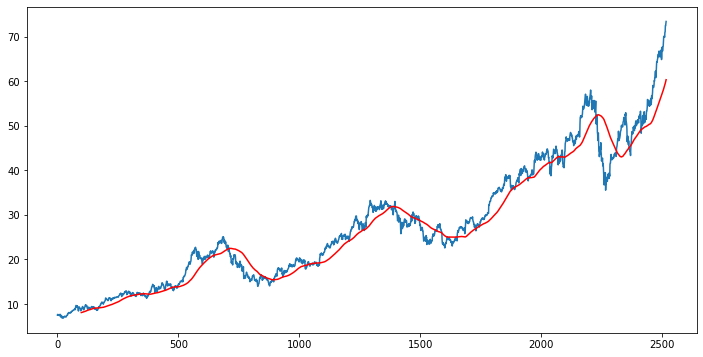

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [14]:
# 200 days moving average

In [15]:
ma200 = df.Close.rolling(200).mean()
ma200


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

In [16]:
# ploting graph for 200 days moving average

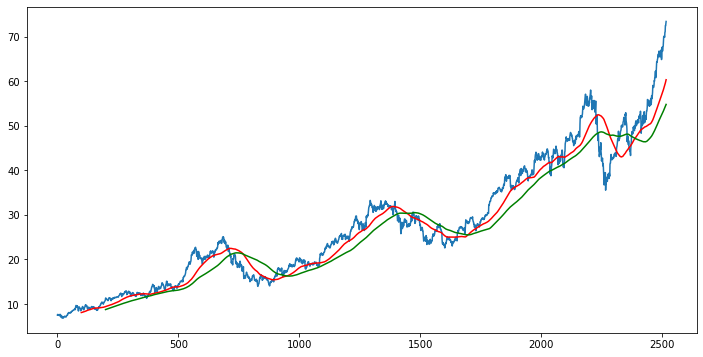

In [17]:

plt.figure(figsize = (12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [18]:
#splliting data into training(70% data from dataset) and testing(30% data from dataset) for data prediction


In [19]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [20]:
# importing data into scaled data from the range of 0 to 1
# we use minmaxscaler() function for importing data 
# thats the way to provide the data to LSTM model

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))

In [22]:
data_training_array = scaler.fit_transform(data_training)
data_training_array


array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [23]:
# logic for predicting closing value depends on previous 100 days
# i.e. the value for 101th day depend on previous 100 days
# we store 100 days closing value in x_train and 101th predicted value in y_train

In [24]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train , y_train = np.array(x_train) , np.array(y_train)

In [25]:
#LSTM model 

In [26]:
from tensorflow.keras.layers import Dense , Dropout , LSTM
from tensorflow.keras.models import Sequential

In [27]:
# 4 layers of LSTM model and dense layer to connect that all 4 layers

In [28]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True,))
model.add(Dropout(0.3)) 


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True,))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [29]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [30]:
# compiling model using adam optimizer and loss as mean squared error

In [31]:
model.compile(optimizer='ADAM', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
52/52 [==============================] - 19s 230ms/step - loss: 0.0524
Epoch 2/50
52/52 [==============================] - 12s 224ms/step - loss: 0.0118
Epoch 3/50
52/52 [==============================] - 12s 222ms/step - loss: 0.0111
Epoch 4/50
52/52 [==============================] - 11s 217ms/step - loss: 0.0101
Epoch 5/50
52/52 [==============================] - 11s 219ms/step - loss: 0.0079
Epoch 6/50
52/52 [==============================] - 12s 232ms/step - loss: 0.0087
Epoch 7/50
52/52 [==============================] - 13s 254ms/step - loss: 0.0078
Epoch 8/50
52/52 [==============================] - 12s 223ms/step - loss: 0.0078
Epoch 9/50
52/52 [==============================] - 11s 216ms/step - loss: 0.0069
Epoch 10/50
52/52 [==============================] - 13s 242ms/step - loss: 0.0075
Epoch 11/50
52/52 [==============================] - 12s 226ms/step - loss: 0.0070
Epoch 12/50
52/52 [==============================] - 13s 249ms/step - loss: 0.0075
Epoch 13/50
5

In [34]:
# saving model

In [43]:
model.save('G03project.h5')

In [44]:
# for predicting testing dataset we need previous 100 days closing values
# but previous 100 days values of testing dataset present in traning data set
# to get that 100 days closing values...

In [45]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [46]:
data_training.tail()

,Close
1756,29.264999
1757,29.072500
1758,29.129999
1759,29.315001
1760,29.190001


In [47]:
past_100_days = data_training.tail(100)

In [48]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [49]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [50]:
# to predict data we scaled from range of 0 to 1

In [51]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [52]:
input_data.shape

(856, 1)

In [53]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [54]:
x_test, y_test = np.array(x_test), np. array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [55]:
# making predictions

In [56]:
y_prediction = model.predict(x_test)
y_prediction.shape

(756, 1)

In [57]:
y_test

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [58]:
y_prediction

array([[0.10192066],
       [0.10286444],
       [0.10368344],
       [0.1043632 ],
       [0.10490024],
       [0.10530877],
       [0.10562904],
       [0.10591985],
       [0.10623536],
       [0.1066221 ],
       [0.10709769],
       [0.10765547],
       [0.10828893],
       [0.10898528],
       [0.10972345],
       [0.11048305],
       [0.11124557],
       [0.11199279],
       [0.1127373 ],
       [0.11349618],
       [0.11428195],
       [0.11509405],
       [0.11591983],
       [0.11684002],
       [0.11792608],
       [0.11922854],
       [0.12078075],
       [0.12261306],
       [0.12473065],
       [0.12711087],
       [0.12970312],
       [0.13245878],
       [0.13534737],
       [0.13834132],
       [0.14140248],
       [0.14448956],
       [0.14757162],
       [0.15062615],
       [0.15362728],
       [0.15654597],
       [0.15935606],
       [0.16203517],
       [0.16460691],
       [0.1670868 ],
       [0.16949338],
       [0.17181548],
       [0.17404266],
       [0.176

In [59]:
scaler.scale_

array([0.02099517])

In [60]:
scale_factor=1/0.02099517
y_prediction = y_prediction * scale_factor
y_test = y_test * scale_factor

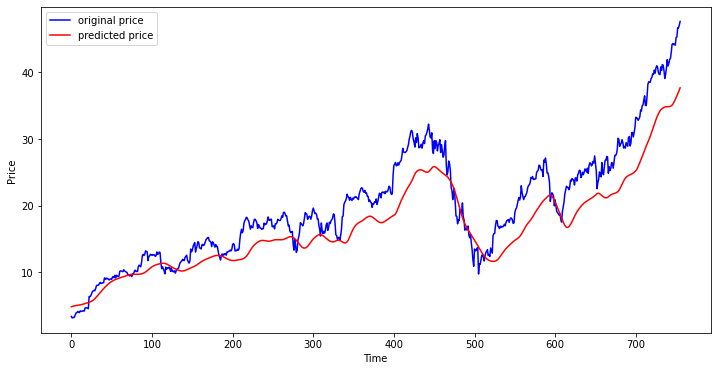

In [61]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label = 'original price')
plt.plot(y_prediction, 'r', label = 'predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()